<h1> Försäkringskostnader Klustring </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

<p> I datasetet är varje rad en kund hos ett försäkringsbolag. Kolumnerna är ålder, kön, bmi, region, antal barn och kostnader. </p>
<p> Detta experimentet kommer att undersöka om vi kan få fram användbar data genom klustring med KMeans. </p>

https://www.kaggle.com/datasets/rajgupta2019/medical-insurance-dataset

In [2]:
dataset = pd.read_csv("Train_Data.csv")

In [3]:
dataset

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452


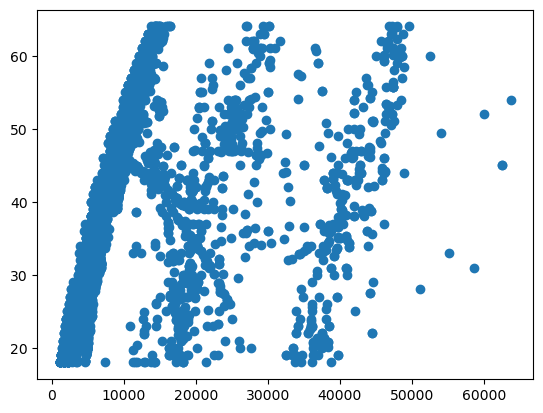

In [4]:
plt.scatter(dataset["charges"], dataset["age"])
plt.show()

<p> Från föregående plot kan man anta att det existerar tre distinkta kluster. </p></br>
<p> För att undersöka mer på djupet kommer kolumnerna rökare och bmi inkluderas. </p>


In [5]:
dataset["smoker"].unique()

array(['no', 'yes'], dtype=object)

In [6]:
dataset['smoker'] = dataset['smoker'].map({'yes': 1, 'no': 0})

In [7]:
X = dataset[["charges", "age", "smoker", "bmi"]]

In [8]:
wcss = []
for i in range(1, 10):
  kmean_model = KMeans(n_clusters = i, init = "k-means++", random_state=21)
  kmean_model.fit(X)
  wcss.append(kmean_model.inertia_)

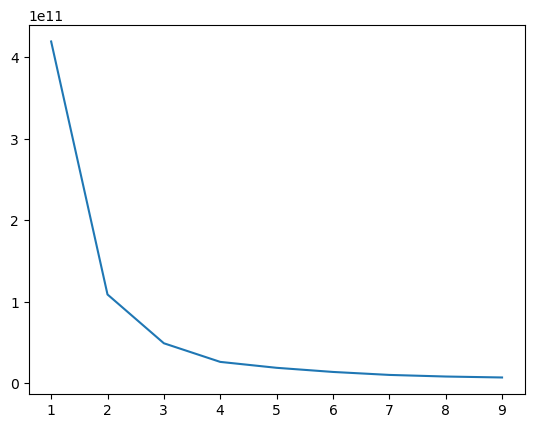

In [9]:
plt.plot(range(1, 10), wcss)
plt.show()

In [10]:
kmean_model = KMeans(n_clusters = 3, init = "k-means++", random_state=21)

In [11]:
kmean_model.fit(X)

KMeans(n_clusters=3, random_state=21)

In [12]:
y_kmean = kmean_model.predict(X)

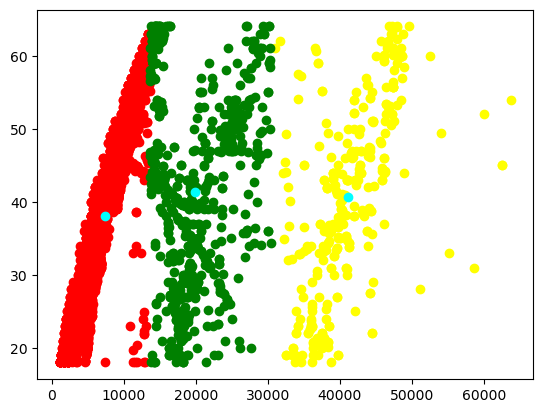

In [13]:
#plt.scatter(X["charges"], X["age"])
plt.scatter(X[y_kmean == 0]["charges"], X[y_kmean == 0]["age"],  color = "red")
plt.scatter(X[y_kmean == 1]["charges"], X[y_kmean == 1]["age"], color = "yellow")
plt.scatter(X[y_kmean == 2]["charges"], X[y_kmean == 2]["age"], color = "green")
plt.scatter(kmean_model.cluster_centers_[:, 0], kmean_model.cluster_centers_[:, 1], color = "cyan")
plt.show()

<p> Även om övre röda klustret går över i grönt kan vi anta att det är en naturlig ökning i priset för folk över 60 år och att kostnaden inte är beroende på bmi eller rökning. </p>

<p> Vidare utforskas om dessa kluster har något med rökning att göra.</p>

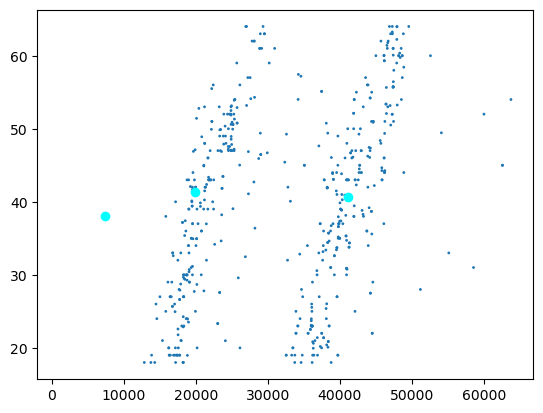

In [14]:
plt.scatter(X["charges"], X["age"], X["smoker"])
plt.scatter(kmean_model.cluster_centers_[:, 0], kmean_model.cluster_centers_[:, 1], color = "cyan")
plt.show()

<p> Det framgår tydligt att kostnaderna för rökare är betydligt högre än för ickerökare. Det finns inga rökare representerade under 10000</p>
<p> För att undersöka vad som skiljer dessa två kluster emellan kollas bmi. </p>

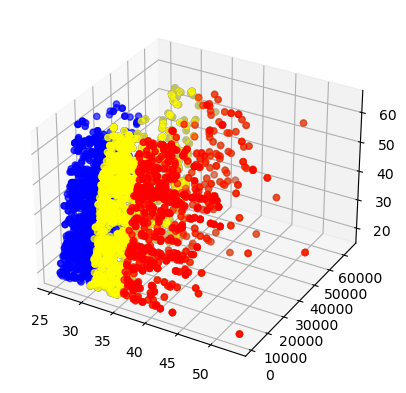

In [15]:
ax = plt.axes(projection ="3d")
ax.scatter3D(dataset["bmi"].where(dataset["bmi"] > 25),X["charges"], X["age"], color="blue")
ax.scatter3D(dataset["bmi"].where(dataset["bmi"] > 30),X["charges"], X["age"], color="yellow")
ax.scatter3D(dataset["bmi"].where(dataset["bmi"] > 35),X["charges"], X["age"], color="red")
plt.show()

<p> Fördelningen är svårtolkad och inte uppenbart åt något håll om bmi påverkar kostnaderna markant. </p>

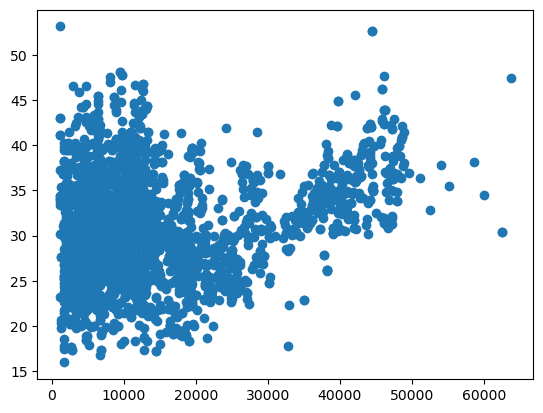

In [16]:
plt.scatter(dataset["charges"],dataset["bmi"])
plt.show()

<p> I grafen ovan ser vi charges beroende på bmi. Låt oss klustra. </p>

In [17]:
charges_bmi = dataset[["charges", "bmi"]]

In [18]:
wcss = []
for i in range(1, 10):
  kmean_model = KMeans(n_clusters = i, init = "k-means++", random_state=21)
  kmean_model.fit(charges_bmi)
  wcss.append(kmean_model.inertia_)

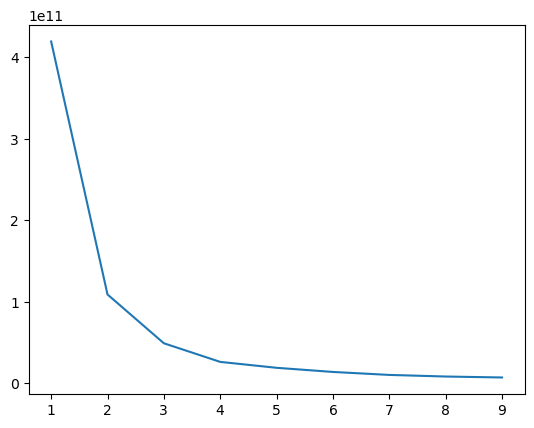

In [19]:
plt.plot(range(1, 10), wcss)
plt.show()

In [20]:
kmean_model = KMeans(n_clusters = 3, init = "k-means++", random_state=21)

In [21]:
kmean_model.fit(charges_bmi)

KMeans(n_clusters=3, random_state=21)

In [22]:
y_kmean = kmean_model.predict(charges_bmi)

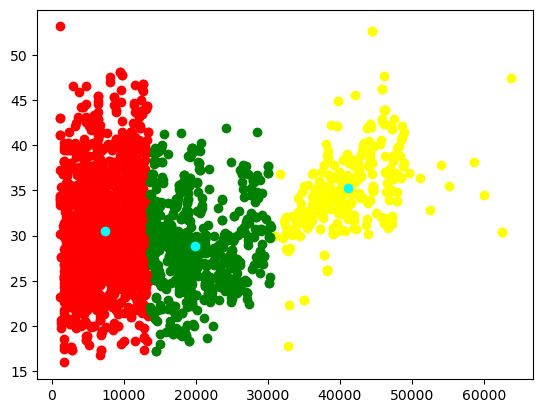

In [23]:
#plt.scatter(X["charges"], X["age"])
plt.scatter(charges_bmi[y_kmean == 0]["charges"], charges_bmi[y_kmean == 0]["bmi"],  color = "red")
plt.scatter(charges_bmi[y_kmean == 1]["charges"], charges_bmi[y_kmean == 1]["bmi"], color = "yellow")
plt.scatter(charges_bmi[y_kmean == 2]["charges"], charges_bmi[y_kmean == 2]["bmi"], color = "green")
plt.scatter(kmean_model.cluster_centers_[:, 0], kmean_model.cluster_centers_[:, 1], color = "cyan")
plt.show()

<p> Likaså här kan vi ser tre destinkta kluster där charges har en gräns från röd till grön kring 13000. </p>

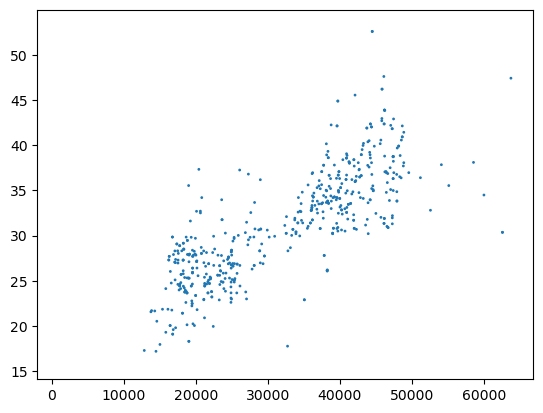

In [24]:
plt.scatter(dataset["charges"],dataset["bmi"], dataset["smoker"])
plt.show()

<p> Bmi avgör inte på samma sätt som rökning ens kostander. Men har man bmi över 30 och röker så ökar ens kostnader markant till över 30000. </p>